<a href="https://colab.research.google.com/github/formroller/ML_clone/blob/master/kaggle/HousePrice/HousePrice_EDA(%EC%A0%95%EB%A6%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**목차**
1. 데이터 이해
2. SalePrice에 대해 알아보자.
 - 수치형 변수와 관계
 - 범주형 변수와 관계
 - 요약
3. 변수 선택(Feature Selection)
 - Correlation Matrix(heatmap)
 - 'Sale Price'상관 행렬도(Zoomed heatmap)
 - 상관관계 높은 변수간 관계
4. 결측치
5. 이상치
 - 일변량 분석
 - 이변량 분석
6. 통계적 가정
 - 정규성 탐색(Histogram, NormalProbability Plot)
    * SalePrice 변환 전/후
    * GrLivArea 변환 전/후
    * TotalBsmtSF 변환 전/후
        - 새로운 변수 생성(HasBsmt)
7. 더미변수
8. 결론

들어가기에 앞서   
이 문서는 HousePrice_EDA를 필사하며 정리하기 위해 작성한 문서이며,
필사를 하며 커널의 흐름에 대해 파악하고 각 항목 별 수행 과정을 관찰하기 위해 작성했다.  
(작성하며 모르는 부분이나 개념에 대해서는 추후에 추가할 것이다.)

**커널은 다변량 회귀분석 문제를 다룰 때 수행해야할 기본적인 분석 프로세스를 제시한다.**

#1.데이터 이해

먼저 데이터 및 라이브러리를 불러온다. 불러온 데이터를 둘러보고 변수의 의미와 데이터 관련성에 대해 생각해본다. 어떤 변수가 문제 해결에 있어 고려되는지 어떤 변수가 문제와 상관이 있는지, 유사한 변수들이 존재하지 않는지 등을 파악하고 중요해 보이는 변수를 추렸다.


**사용 코드**  
df_train=pd.read_csv('train.csv')  
head(), info(), shape()

#2.SalePrice에 대해 알아보자

'SalePrice' 변수의 통계량(분포, 평균, 분산등)을 확인하고 히스토그램을 그려 데이터에 대해 파악한다.  
히스토그램을 통해 데이터가<u>1) 정규분포를 따르지 않고</u> <u>2)오른쪽으로 꼬리가 긴 왜도를 갖으며</u> <u>3) 첨도가 뾰족</u>하다는 것을 알 수 있었다. 

이 외에도 **SalePrice**와 수치·범주형 변수간의 관계를 살펴본다.  수치형 변수(GrLivArea, TotalBsmtSF)와의 관계는 *산점도(Scatter Plot)*를 통해, 범주형 변수(OverallQual,YearBuilt)와의 관계는 *상자그림(Box Plot)*을 통해 알아봤으며 각각 **SalePrice**와 선형 관계를 갖는 것을 알 수 있었다.


**사용 코드**  
* df.describe()  , 간략한 통계량(4분위, 평균, 분산 등)  
* sns.distplot(df[col]), 히스토그램과 추세선  
* df[col].skew(), 왜도  
* df[col].kurt(),  첨도  

[설명]
* 왜도의 꼬리가 오른쪽으로 긴 경우(양의 왜도)  $최빈값<중앙값<평균$

 평균은 극단값에 민감하고, 중윗값은 덜 민감하다. 
오른쪽이 길다는 것은 오른쪽 끝에 극단값이 있어 늘어진 것이며 그래서 평균이 중윗값보다 오른쪽에 있으므로(평균-중윗값) 양(>0)이 되어 양의 왜도라고 외운다. 
  
  <br>
* 첨도가 뾰족하다.  
 평균을 중심으로 얼마나 뾰족하게 분포되어 있는지를 나타낸다. 양의 값일 경우 분포가 뾰족하고 음의 값일 경우 분포가 평평하다.

#3.변수 선택(Fature Selection)

데이터에 주관성을 부여하는 것은 좋지 못한 방식이며 이를 배제하기 위해 상관행렬도(correlation matrix)를 heatmap 방식으로 살펴본다.  
상관행렬도를 통해 알 수 있는 것은 다음과 같다.

1. 변수간 상관계수, 
2. **SalePrice**변수와 주요 변수들간의 상관계수, 
3. 상관관계가 높은 변수간 상관관계  


heatmap을 통해 유사한 성질의 변수가 있음을 확인하고 해당 변수를 제거함으로써 다중공성선을 예방할 수 있었다.

**사용 코드**  
* sns.heatmap
* corrmat.nlargets(n), n번째로 큰수 (corrmat=df.corr())
* np.corrcoef(df[col].values.T)
* sns.pariplot(df[col]) col 변수간 산점도

#4.결측치
* 누락된 데이터의 분포가 넓은가?
* 결측치가 랜덤인지 패턴을 갖는지?

결측값은 표본 크기의 감소를 의미할 수 있기 때문에 이를 처리하는 것 역시 데이터 분석의 중요한 부분이다. 그러므로 실질적인 관점에서 누락 데이터가 편향되지 않고 불편한 진실을 감추지 않도록 해야 한다.

이번 장에서 필자는 데이터가 <u>15%이상 누락된 경우</u> 해당 변수를 삭제하고 존재하지 않는 것으로 간주해야 한다고 말한다.
따라서 해당 변수들을 제거하고 추가적으로 일부 유사한 변수들에서 동일한 수의 누락 데이터가 있음을 발견하고 해당 데이터 또한 제거했다.

**사용 코드**
* total  
 df.isna().sum().sort_values(ascending=False)
* percent  
 (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
* missing_data  
 pd.concat([total,percent], axis=1,keys=['Total','Percent'])

#5.이상치

이상치는 모델에 현저한 영향을 줄 수도 있고 통찰을 제공하는 귀한 정보가 될 수 있기 때문에 복잡한 주제인 동시에 더 관심을 기울여야 하는 주제이다. 
<u>**1)일변량 분석**</u>에서는 관측치에 대해 표준화를 수행하고 이상치 범위를 설정한다.   
(표준화는 평균(μ)이 0, 표준편차(δ)가 1이 되도록 변환하는 것을 말한다. )

<u>**)2이변량 분석**</u>에서는 수치형 변수(GrLivArea,TotalBamtSF)에 대해 산점도를 그려 변수들이 갖는 경향과 삭제할 이상치를 확인한다. 

#6.통계적 가정
**다변량 회귀 분석의 가정사항 충족여부 확인**  
거의 모든 모수·비모수적 가설검정들은 정규성, 독립성, 또는 등분산성을 가정하기 때문에 가설 검정을 수행하기 전 이런 가정들을 검정하는 작업이 선행되어야 한다. 이번 장에서는 종속변수('SalePrice')가 다변량 기술을 적용할 수 있는 통계적 가정을 어떻게 준수하는지에 대해 설명한다. 

##a.정규성(Normality)
    데이터가 정규분포를 보여야 한다. 이는 여러 통계 검정이 이에 의존하기 때문이다(ex t-statics).
    중심극한정리에 의해 표본수(n)가 30이 넘어가면 데이터셋이 정규분포에 가까워지며 일변량 변수가 정규성을 띈다고해서 다변량 모두가 정규성을 보장하지는 않는다. 
    그러나, 경우에 따라 30이 넘어감에도 데이터의 특이성에 따라 정규분포를 따르지 않을 수 있기 때문에 정규성 검정을 통해 정규분포를 확인한다.
    참고로 오른쪽으로 긴 꼬리가 긴 Positive Skewness 분포일 때 log 변환으로 쉽게 정규분포화 할 수 있다.
    (이번 장에서는 histogram과 probability plot을 사용해 데이터의 분포를 확인함으로 정규성을 따르는지 확인한다.)

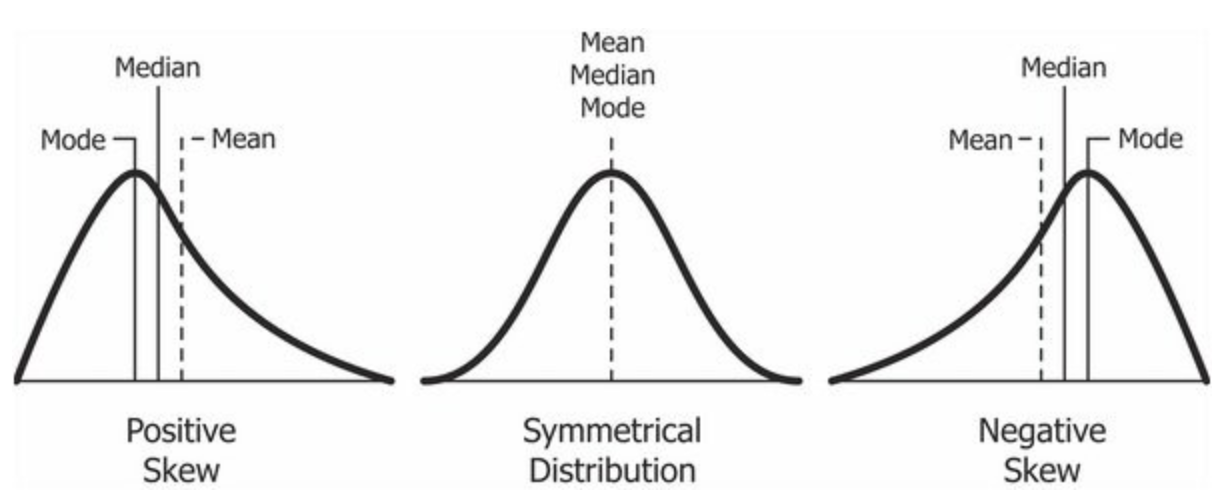

## b.등분산성(Homoscedasticity)
    종속변수가 동일한 분산을 띄는지 살펴본다.
    이 종속변수의 등분산성은 잔차항(error term)이 독립변수 값들에 상관없이 일정하도록 해주는데 필수적인 요소이다. 
    반대로 이분산성은 원뿔 모형(conic shape)을 보이는데, 만약 두 개의 수치형 변수로 이뤄진 독립/종속 변수 간의 산점도를 그려보았을 때 한쪽은 작은 분산, 반대쪽은 큰 분산인 형태를 띈다.
    하지만 이분산성은 보통 정규화로 극복이 가능하다.

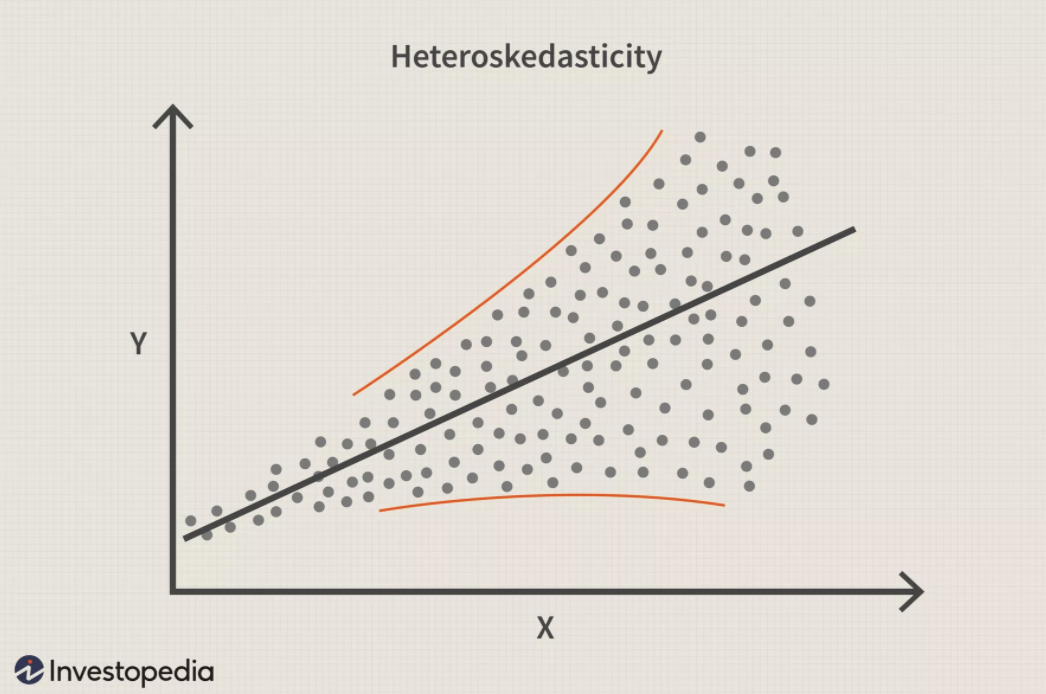

## c.선형성(Linearity)
    회귀분석에서 중요한 기본가정으로 예측하고자 하는 종속변수 y와 독립변수 x간에 선형성을 만족하는 특성을 의미한다. 
    선형성을 평가하는 일반적인 방법은 산점도를 그려 선형 패턴을 탐색하는 것이다.
    만약 변주 중 일부가 선형성을 만족하지 않는다면 
        1) 새로운 변수 추가
        2) 로그, 지수, 루트 등 변수 변환 수행(비추천-해석 어려움)
        3) 선형성을 만족하지 않는 변수 제거
        4) 선형 회귀모델을 만들고 변수 선택법을 통과시킨다 (가장 추천)

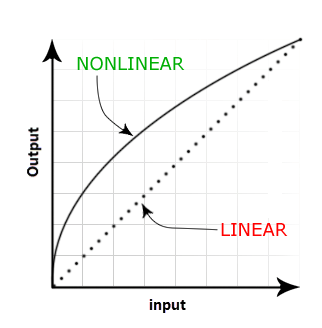

## d.잔차의 상관성(Absence of correlated errors)
    잔차(error)간 상관관계가 있는 것을 의미한다.(귀무가설은 잔차의 상관성이 없음을 가정한다).
    잔차 상관성이 위배되는 일은 보통 시계열(Time-Series)데이터에서 자주 발생한다. 
    아래 그림은 선형성이 존재할 때 잔차의 분포도이다. 
    하단의 오른쪽 그림과 같이 잔차가 무작위하게 분포된 경우 잔차들이 서로 상관관계가 없으며 이는 잔차의 독립성 만족을 의미한다.

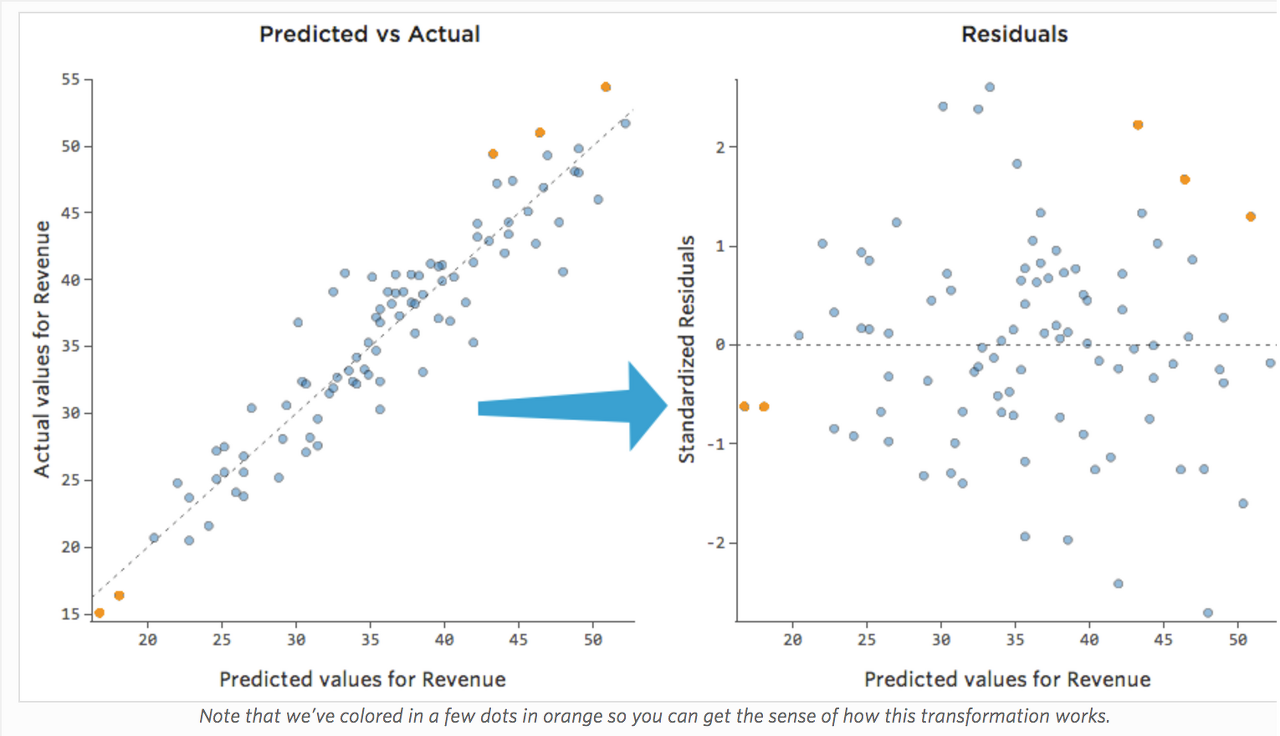

* 참고자료  

> [Multivariate regression(다변량 회귀분석) 프로세스](https://techblog-history-younghunjo1.tistory.com/118)